<a href="https://colab.research.google.com/github/Preetham-Shetty/Data-Science/blob/main/BusinessSalesPredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/BusinessSales.csv')
df.head()

,division,level of education,training level,work experience,salary,sales
0,peripherals,associate's degree,1,2,66790,193711
1,office supplies,high school,0,4,63143,200167
2,printers,associate's degree,0,6,86480,274258
3,computer software,associate's degree,2,5,103573,358491
4,computer hardware,some college,1,2,72166,216003


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [ ]:
df.nunique()

division                5
level of education      5
training level          4
work experience        17
salary                993
sales                 998
dtype: int64

In [ ]:
df['division'].unique()

array(['peripherals', 'office supplies', 'printers', 'computer software',
       'computer hardware'], dtype=object)

In [ ]:
df['level of education'].unique()

array(["associate's degree", 'high school', 'some college',
       "bachelor's degree", "master's degree"], dtype=object)

In [ ]:
d = {'peripherals':1, 'office supplies':2, 'printers':3, 'computer software':4,
       'computer hardware':5}
df['division'] = df['division'].map(d)

In [ ]:
d = {"associate's degree":1, 'high school':2, 'some college':3,
       "bachelor's degree":4, "master's degree":5}
df['level of education'] = df['level of education'].map(d)

In [ ]:
df.isnull().sum()

division              0
level of education    0
training level        0
work experience       0
salary                0
sales                 0
dtype: int64

In [ ]:
df.columns

Index(['division', 'level of education', 'training level', 'work experience',
       'salary', 'sales'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()

In [ ]:
X = df[['division', 'level of education', 'training level', 'work experience',
       'salary']]
scaledX = scale.fit_transform(X)
y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(scaledX,y,train_size=0.7, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_test,y_test)

LinearRegression()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.07228944371985431

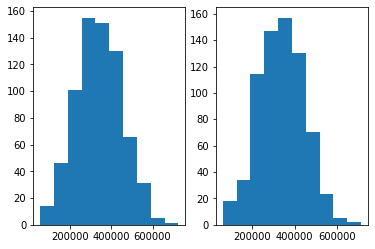

In [ ]:
plt.subplot(1,2,1)
plt.hist(y_test)

plt.subplot(1,2,2)
plt.hist(y_pred)

plt.show()